In [ ]:
from google.colab import files
api_token = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
# import requests
# import numpy as np
# import pandas as pd

# r = requests.get('https://coderbyte.com/api/challenges/json/age-counting')
# print(r.json()['data'])

# value=r.json()['data']
# # print(len(r.json()['data']))

# g=[]
# import re
# xx = value
# r1 = re.findall(r"age=\d\d",xx)
# for i in r1:
#   num=re.findall(r'\d\d',i)
#   if int(num[0])>=50:
#     g.append(int(num[0]))


# len(g)   

In [ ]:
'''
What is channel and band ?

A band is what is used to control volume in different frequencies.
Channels break up the frequency range into individual channels. 
This allows the hearing aid to differentiate noise from speech. 
The more channels the hearing aid has the more fine tuned it can be.


There are 4 fles which i am using


grid_sizes.csv.zip
where x and y axis defined for each image

train_wkt_v4.csv.zip
Here polygons are defined for each image, which is used for masking

three_band.zip
3 or RGB band images

sixteen_band.zip
8 channes, where M, P, A bands



The training data set includes 25 images, each with 20 channels (3 band (3
channels, RGB) + A band (8 channels) + M band (8 channels) + P band (1
channel)), and the corresponding labels of objects. 

There are 10 types of overlapping objects labeled with contours (wkt type of data)

The classes are defined as 0. Buildings, 1. Misc, 2. Road, 3. Track, 4. Trees,
5. Crops, 6. Waterway, 7. Standing water, 8. Vehicle Large, 9. Vehicle
Small. 

Each image covers 1 square kilometer of the earth surface.


'''

'\nWhat is channel and band ?\n\nA band is what is used to control volume in different frequencies.\nChannels break up the frequency range into individual channels. \nThis allows the hearing aid to differentiate noise from speech. \nThe more channels the hearing aid has the more fine tuned it can be.\n\n\nThere are 4 fles which i am using\n\n\ngrid_sizes.csv.zip\nwhere x and y axis defined for each image\n\ntrain_wkt_v4.csv.zip\nHere polygons are defined for each image, which is used for masking\n\nthree_band.zip\n3 or RGB band images\n\nsixteen_band.zip\n8 channes, where M, P, A bands\n\n\n\nThe training data set includes 25 images, each with 20 channels (3 band (3\nchannels, RGB) + A band (8 channels) + M band (8 channels) + P band (1\nchannel)), and the corresponding labels of objects. \n\nThere are 10 types of overlapping objects labeled with contours (wkt type of data)\n\nThe classes are defined as 0. Buildings, 1. Misc, 2. Road, 3. Track, 4. Trees,\n5. Crops, 6. Waterway, 7. Stan

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle competitions download -c dstl-satellite-imagery-feature-detection

  0% 0.00/2.17k [00:00<?, ?B/s]
100% 2.17k/2.17k [00:00<00:00, 1.88MB/s]
100% 12.9G/12.9G [04:20<00:00, 101MB/s] 
100% 12.9G/12.9G [04:20<00:00, 53.1MB/s]
100% 14.9k/14.9k [00:00<00:00, 144kB/s]

 54% 6.00M/11.1M [00:00<00:00, 61.5MB/s]
100% 11.1M/11.1M [00:00<00:00, 69.5MB/s]
 49% 7.00M/14.2M [00:00<00:00, 72.1MB/s]
100% 14.2M/14.2M [00:00<00:00, 86.6MB/s]
100% 7.29G/7.30G [02:08<00:00, 33.1MB/s]
100% 7.30G/7.30G [02:08<00:00, 61.2MB/s]


In [ ]:
import numpy as np
import pandas as pd
import cv2
import os
import random
import datetime
import matplotlib.pyplot as plt
from shapely.wkt import loads as wkt_loads
import tifffile as tiff

from keras import backend as K
# from sklearn.metrics import jaccard_similarity_score

from shapely.geometry import MultiPolygon, Polygon
import shapely.wkt
import shapely.affinity
from collections import defaultdict
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as keras
import gc
import warnings
import zipfile
warnings.filterwarnings("ignore")
from keras.models import load_model
import tensorflow as tf
import random as rn
from tqdm import tqdm
from tensorflow.keras.callbacks import Callback, ModelCheckpoint, ReduceLROnPlateau, LearningRateScheduler
from tqdm import tqdm

In [ ]:
os.mkdir('/kaggle')
os.mkdir('/kaggle/data')
os.mkdir('/kaggle/msk')
os.mkdir('/kaggle/model_weights')
os.mkdir('/kaggle/subm')

FileExistsError: ignored

In [ ]:
TR = pd.read_csv('/content/grid_sizes.csv.zip')
T_W = pd.read_csv('/content/train_wkt_v4.csv.zip')


In [ ]:
T_W

ImageId  ClassType                                    MultipolygonWKT
0    6040_2_2          1                                 MULTIPOLYGON EMPTY
1    6040_2_2          2                                 MULTIPOLYGON EMPTY
2    6040_2_2          3                                 MULTIPOLYGON EMPTY
3    6040_2_2          4  MULTIPOLYGON (((0.003025 -0.007879000000000001...
4    6040_2_2          5  MULTIPOLYGON (((0.005311 -0.009044999999999999...
..        ...        ...                                                ...
245  6100_2_2          6  MULTIPOLYGON (((0.006102 -0.009042, 0.00642 -0...
246  6100_2_2          7  MULTIPOLYGON (((0.007887999999999999 -0.009042...
247  6100_2_2          8  MULTIPOLYGON (((0.002119 -0.001417, 0.002132 -...
248  6100_2_2          9  MULTIPOLYGON (((0.008021 -0.003252, 0.00803399...
249  6100_2_2         10  MULTIPOLYGON (((0.003194 -0.0089, 0.003201 -0....

[250 rows x 3 columns]

In [ ]:
T_W[T_W['ImageId']=='6040_2_2']

ImageId  ClassType                                    MultipolygonWKT
0  6040_2_2          1                                 MULTIPOLYGON EMPTY
1  6040_2_2          2                                 MULTIPOLYGON EMPTY
2  6040_2_2          3                                 MULTIPOLYGON EMPTY
3  6040_2_2          4  MULTIPOLYGON (((0.003025 -0.007879000000000001...
4  6040_2_2          5  MULTIPOLYGON (((0.005311 -0.009044999999999999...
5  6040_2_2          6                                 MULTIPOLYGON EMPTY
6  6040_2_2          7                                 MULTIPOLYGON EMPTY
7  6040_2_2          8                                 MULTIPOLYGON EMPTY
8  6040_2_2          9                                 MULTIPOLYGON EMPTY
9  6040_2_2         10                                 MULTIPOLYGON EMPTY

In [ ]:
'''
grid_sizes.csv - the sizes of grids for all the images

    ImageId - ID of the image
    Xmax - maximum X coordinate for the image
    Ymin - minimum Y coordinate for the image

'''

TR.rename(columns = {'Unnamed: 0':'ImageId'}, inplace = True)
TR

ImageId      Xmax      Ymin
0    6120_2_4  0.009180 -0.009040
1    6120_2_3  0.009169 -0.009040
2    6120_2_2  0.009188 -0.009040
3    6120_2_1  0.009188 -0.009040
4    6120_2_0  0.009188 -0.009040
..        ...       ...       ...
445  6130_1_4  0.009169 -0.009040
446  6130_1_3  0.009188 -0.009040
447  6130_1_2  0.009150 -0.009042
448  6130_1_1  0.009004 -0.009045
449  6130_1_0  0.009188 -0.009040

[450 rows x 3 columns]

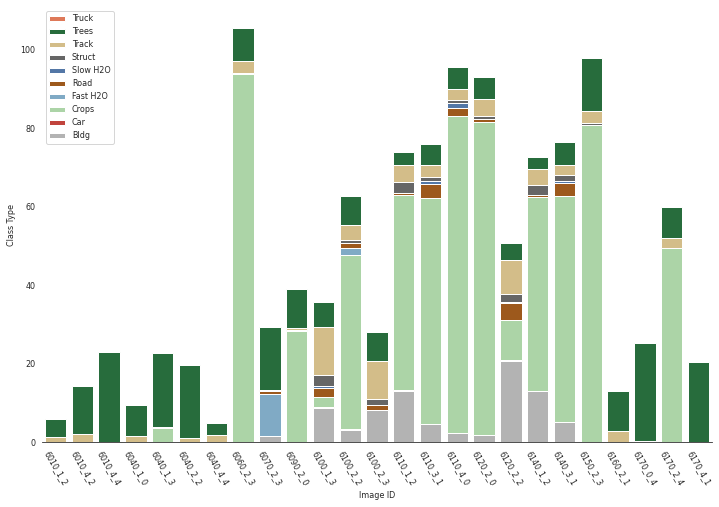

In [ ]:
all_train_names = sorted(T_W.ImageId.unique())

import shapely.wkt as wkt
import sys
import seaborn as sns

CLASSES = {
    1: 'Bldg',
    2: 'Struct',
    3: 'Road',
    4: 'Track',
    5: 'Trees',
    6: 'Crops',
    7: 'Fast H2O',
    8: 'Slow H2O',
    9: 'Truck',
    10: 'Car',
}

COLORS = {
    1: '0.7',
    2: '0.4',
    3: '#b35806',
    4: '#dfc27d',
    5: '#1b7837',
    6: '#a6dba0',
    7: '#74add1',
    8: '#4575b4',
    9: '#f46d43',
    10: '#d73027',
}

# ZORDER defines the priority for plotting overlay of class labels.
ZORDER = {
  1: 6,
  2: 5,
  3: 4,
  4: 1,
  5: 3,
  6: 2,
  7: 7,
  8: 8,
  9: 9,
  10: 10,
}


def get_image_area(image_id):
    '''
    Calculate the area of an image
    :param image_id:
    :return:
    '''
    xmax = TR[TR.ImageId == image_id].Xmax.values[0]
    ymin = TR[TR.ImageId == image_id].Ymin.values[0]

    return abs(xmax * ymin)



def get_polygon_list(image_id, class_type):
    '''
    Load the wkt data (relative coordiantes of polygons) from csv file and
    returns a list of polygons (in the format of shapely multipolygon)
    :param image_id:
    :param class_type:
    :return:
    '''
    all_polygon = T_W[T_W.ImageId == image_id]
    polygon = all_polygon[all_polygon.ClassType == class_type].MultipolygonWKT
    # For empty polygon, polygon is a string of 'MULTIPOLYGON EMPTY'
    # wkt.loads will automatically handle this and len(polygon_list) returns 0
    # But polygon_list will never be None!
    polygon_list = wkt.loads(polygon.values[0])

    return polygon_list
import seaborn as sns
def image_stat(image_id):
    '''
    Return the statistics of an image as a pd dataframe
    :param image_id:
    :return:
    '''
    counts, total_area, mean_area, std_area = {}, {}, {}, {}
    img_area = get_image_area(image_id)

    for cl in CLASSES:
        polygon_list = get_polygon_list(image_id, cl)
        counts[cl] = len(polygon_list)
        if len(polygon_list) > 0:
            total_area[cl] = np.sum([poly.area for poly in polygon_list])\
                             / img_area * 100.
            mean_area[cl] = np.mean([poly.area for poly in polygon_list])\
                            / img_area * 100.
            std_area[cl] = np.std([poly.area for poly in polygon_list])\
                           / img_area * 100.

    return pd.DataFrame({'Class': CLASSES, 'Counts': counts,
                         'TotalArea': total_area, 'MeanArea': mean_area,
                         'STDArea': std_area})









def collect_stats():
    '''
    Collect the area statistics for all images and concatenate them
    :return:
    '''
    stats = []
    total_no = len(all_train_names) - 1

    for image_no, image_id in enumerate(all_train_names):
        stat = image_stat(image_id)
        stat['ImageId'] = image_id
        stats.append(stat)
        sys.stdout.write('\rCollecting class stats [{}{}] {}%'.\
                         format('=' * image_no,
                                ' ' * (total_no - image_no),
                                100 * image_no / total_no))
        sys.stdout.flush()
    sys.stdout.write('\n')
    return pd.concat(stats)



def plot_bar_stats():

    stats = collect_stats()
    pvt = stats.pivot(index = 'Class', columns = 'ImageId', values = 'TotalArea')
    perc_area = np.cumsum(pvt, axis = 0)
    class_r = {}
    sns.set_style('white')
    sns.set_context({'figure.figsize': (12, 8)})

    for cl in CLASSES: class_r[CLASSES[cl]] = cl

    for cl in np.arange(1, 11):
        class_name = perc_area.index[-cl]
        class_id = class_r[class_name]
        ax = sns.barplot(x = perc_area.columns, y = perc_area.loc[class_name],
                         color = COLORS[class_id], label = class_name)
    ax.legend(loc = 2)
    sns.despine(left = True)
    ax.set_xlabel('Image ID')
    ax.set_ylabel('Class Type')
    ax.set_xticklabels(perc_area.columns, rotation = -60)



'''
In this plot X_axis is Image_ID and Y_axis is area of the object with respect to that perticular image.

This plot explains how each class is distributed for each image, we can see most of the bars are colored with green, 
it means most of the images have Trees and crops, object classes.


'''
plot_bar_stats()

In [ ]:
final_data=collect_stats().reset_index(drop=True)
final_data

Class  Counts  TotalArea  MeanArea   STDArea   ImageId
0        Bldg       0        NaN       NaN       NaN  6010_1_2
1      Struct      44   0.065338  0.001485  0.000974  6010_1_2
2        Road       0        NaN       NaN       NaN  6010_1_2
3       Track      12   1.335305  0.111275  0.142005  6010_1_2
4       Trees    1733   4.566124  0.002635  0.006185  6010_1_2
..        ...     ...        ...       ...       ...       ...
245     Crops       0        NaN       NaN       NaN  6170_4_1
246  Fast H2O       0        NaN       NaN       NaN  6170_4_1
247  Slow H2O       0        NaN       NaN       NaN  6170_4_1
248     Truck       0        NaN       NaN       NaN  6170_4_1
249       Car       0        NaN       NaN       NaN  6170_4_1

[250 rows x 6 columns]

[Text(0, 0, '6010_1_2'),
 Text(0, 0, '6010_4_2'),
 Text(0, 0, '6010_4_4'),
 Text(0, 0, '6040_1_0'),
 Text(0, 0, '6040_1_3'),
 Text(0, 0, '6040_2_2'),
 Text(0, 0, '6040_4_4'),
 Text(0, 0, '6060_2_3'),
 Text(0, 0, '6070_2_3'),
 Text(0, 0, '6090_2_0'),
 Text(0, 0, '6100_1_3'),
 Text(0, 0, '6100_2_2'),
 Text(0, 0, '6100_2_3'),
 Text(0, 0, '6110_1_2'),
 Text(0, 0, '6110_3_1'),
 Text(0, 0, '6110_4_0'),
 Text(0, 0, '6120_2_0'),
 Text(0, 0, '6120_2_2'),
 Text(0, 0, '6140_1_2'),
 Text(0, 0, '6140_3_1'),
 Text(0, 0, '6150_2_3'),
 Text(0, 0, '6160_2_1'),
 Text(0, 0, '6170_0_4'),
 Text(0, 0, '6170_2_4'),
 Text(0, 0, '6170_4_1')]

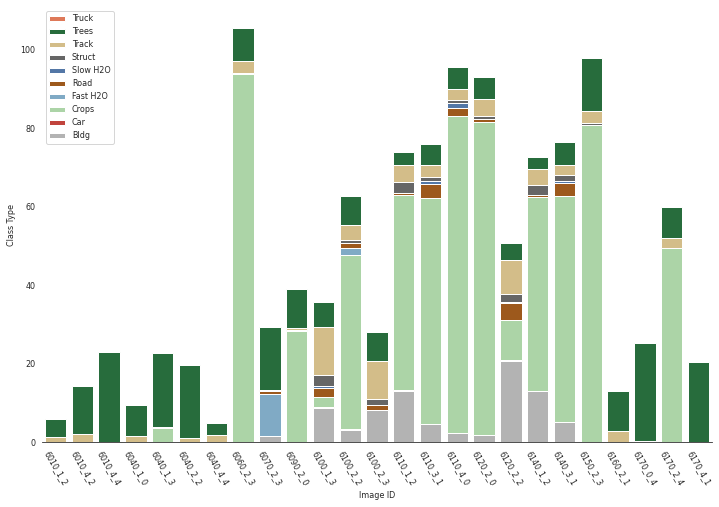

In [ ]:
stats = collect_stats()
pvt = stats.pivot(index = 'Class', columns = 'ImageId', values = 'TotalArea')
perc_area = np.cumsum(pvt, axis = 0)
class_r = {}
sns.set_style('white')
sns.set_context({'figure.figsize': (12, 8)})

for cl in CLASSES: class_r[CLASSES[cl]] = cl

for cl in np.arange(1, 11):
    class_name = perc_area.index[-cl]
    class_id = class_r[class_name]
    ax = sns.barplot(x = perc_area.columns, y = perc_area.loc[class_name],
                      color = COLORS[class_id], label = class_name)
ax.legend(loc = 2)
sns.despine(left = True)
ax.set_xlabel('Image ID')
ax.set_ylabel('Class Type')
ax.set_xticklabels(perc_area.columns, rotation = -60)

In [ ]:
perc_area

ImageId   6010_1_2   6010_4_2   6010_4_4  ...   6170_0_4   6170_2_4   6170_4_1
Class                                     ...                                 
Bldg           NaN        NaN        NaN  ...        NaN        NaN        NaN
Car            NaN        NaN        NaN  ...        NaN        NaN        NaN
Crops          NaN        NaN        NaN  ...        NaN  49.562020        NaN
Fast H2O       NaN        NaN        NaN  ...        NaN        NaN        NaN
Road           NaN        NaN        NaN  ...        NaN        NaN        NaN
Slow H2O       NaN        NaN        NaN  ...   0.015184  49.570913        NaN
Struct    0.065338        NaN        NaN  ...   0.016831  49.571974        NaN
Track     1.400643   1.950990        NaN  ...   0.216320  52.080463   0.134936
Trees     5.966767  14.299274  22.869146  ...  25.122371  59.869516  20.368300
Truck          NaN        NaN        NaN  ...        NaN        NaN        NaN

[10 rows x 25 columns]

In [ ]:
IM_ID = '6120_2_2'
POLY_TYPE = '1'  # buildings

# Load grid size
inDir = 'dstl-satellite-imagery-feature-detection'


x_max, y_min =float(TR[TR['ImageId']==IM_ID]['Xmax']),float(TR[TR['ImageId']==IM_ID]['Ymin'])





# Load train poly with shapely
train_polygons = None


T_W_M=T_W[T_W['ImageId']==IM_ID]
poly=list(T_W_M[T_W_M['ClassType']==1]['MultipolygonWKT'])

train_polygons=shapely.wkt.loads(poly[0])

# Read image with tiff

# Function for reading RGB images

def Three(image_id):
    # https://www.kaggle.com/aamaia/dstl-satellite-imagery-feature-detection/rgb-using-m-bands-example
    zip_path = '/content/three_band.zip'
    tgtImg = '{}.tif'.format(image_id)
    with zipfile.ZipFile(zip_path) as myzip:
        files_in_zip = myzip.namelist()
        for fname in files_in_zip:
            if fname.endswith(tgtImg):
                with myzip.open(fname) as myfile:
                    img = tiff.imread(myfile).transpose([1, 2, 0])
                    return img
                
                
im_rgb=Three(IM_ID)                
im_size = im_rgb.shape[:2]
im_size

(3348, 3403)

In [ ]:
im_rgb.shape

(3348, 3403, 3)

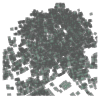

In [ ]:
# How to read a polygon vectors.

T_W_M=T_W[T_W['ImageId']==IM_ID]
poly=list(T_W_M[T_W_M['ClassType']==1]['MultipolygonWKT'])



shapely.wkt.loads(poly[0])


In [ ]:
train_polygons.area

1.716780789863028e-05

In [ ]:
im_size

(3348, 3403)

In [ ]:
x_max, y_min

(0.009188, -0.009040000000000001)

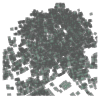

In [ ]:
train_polygons

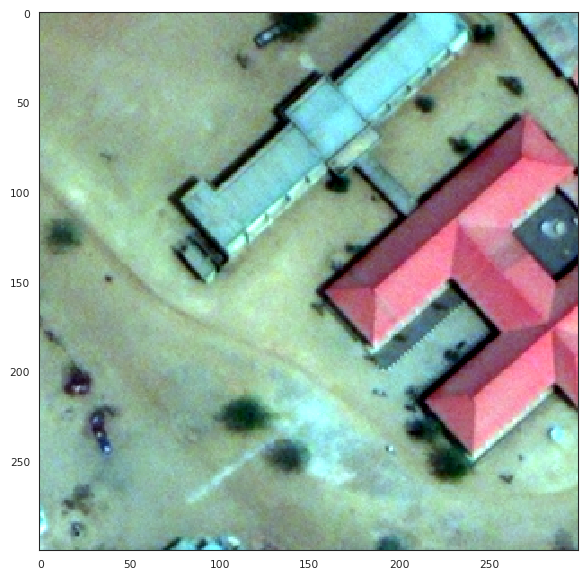

In [ ]:


'''
scale_percentile takes input Three bands (RGB) image matrix which is generated by the function Three() which defined above.

It helps in enhancing the image for a better vision to see the details in the image.

Here it uses two values mins(1 percentile value of the matrix) and maxs(99 percentile value of the matrix) 

we rescale the original matrix by (matrix-mins)/maxs and return the modified matrix



'''

def scale_percentile(matrix):
    w, h, d = matrix.shape
    matrix = np.reshape(matrix, [w * h, d]).astype(np.float64)
    # Get 2nd and 98th percentile
    mins = np.percentile(matrix, 1, axis=0)
    maxs = np.percentile(matrix, 99, axis=0) - mins
    matrix = (matrix - mins[None, :]) / maxs[None, :]
    matrix = np.reshape(matrix, [w, h, d])
    matrix = matrix.clip(0, 1)
    return matrix



tiff.imshow(255 * scale_percentile(im_rgb[2900:3200,2000:2300]));

(<Figure size 988.8x604.8 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7f2395f14fd0>)

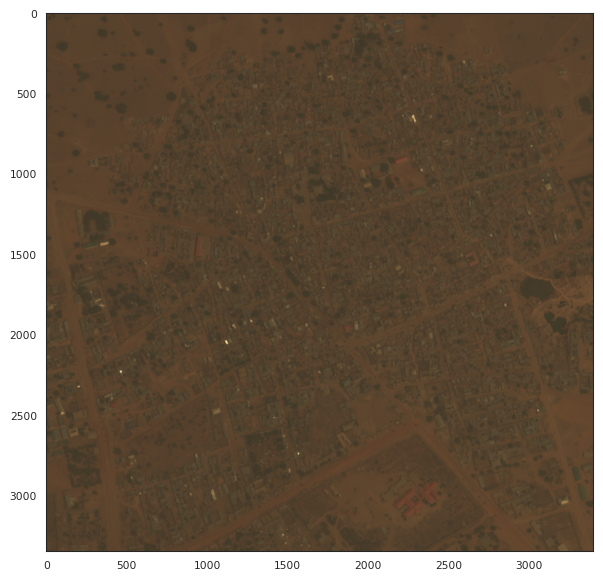

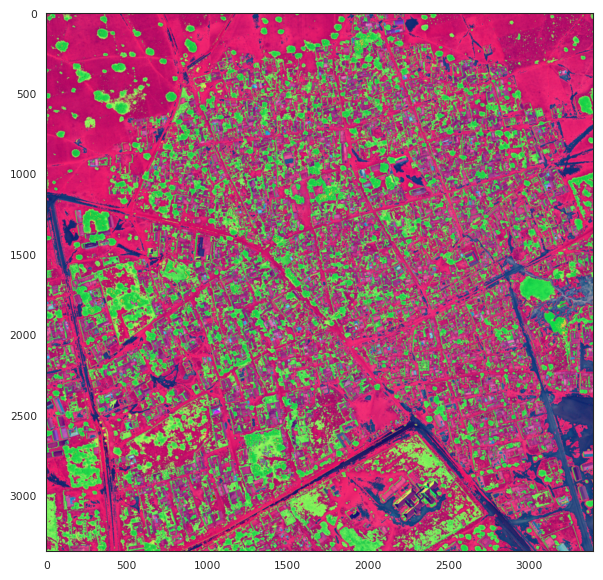

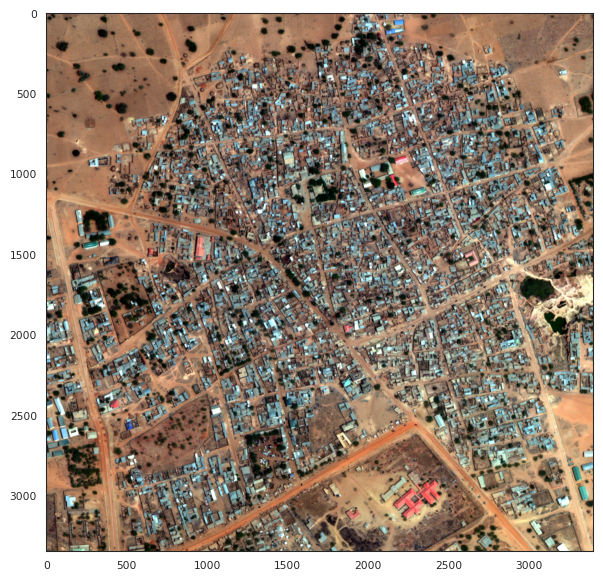

In [ ]:

# Here you can see the importance of scale_percentile function with exampple of 3 images

tiff.imshow(im_rgb)

tiff.imshow(255*im_rgb)

tiff.imshow(255*scale_percentile(im_rgb))

In [ ]:
'''
get_scalar() help in allgining the masked image, in a proper neat manner

Here I have created two polygon vectors(train_polygons_scaled, train_polygons_scaled_modified) for masking for a better understanding of the get_scalar function 



'''
def get_scalers():
    h, w = im_size  # they are flipped so that mask_for_polygons works correctly
    w_ = w * (w / (w + 1))
    print('w_',w_)
    h_ = h * (h / (h + 1))
    print('h_',h_)
    return w_ / x_max, h_ / y_min

x_scaler, y_scaler = get_scalers()

print('x,y scalar values',x_scaler, y_scaler)



# x,y scalar values 370265.59575228917 -370243.39586245525 which is generated by get_scalar.
train_polygons_scaled = shapely.affinity.scale(train_polygons, xfact=x_scaler, yfact=y_scaler,origin=(0, 0, 0))

train_polygons_scaled_modified = shapely.affinity.scale(train_polygons, xfact=300265, yfact=-310265)




'''
Function ( mask_for_polygons ) for generating vectors for masked images through polygon vectors

Here we are creating an empty array ( img_mask ), size of the original image ( im_size ) where the values will be zeros.

creating two vectors of vertices exterior and interior, exterior which returns a non-masked object and interior return masked object

exteriors = [int_coords(poly.exterior.coords) for poly in polygons]
interiors = [int_coords(pi.coords) for poly in polygons for pi in poly.interiors]

generating a masked array through cv2.fillPoly() where it fills img_mask with 1 with help of exteriors vertices and 0 with the help of interior vertices.  

and returns a masked vector for the original image.

'''


def mask_for_polygons(polygons):
    img_mask = np.zeros(im_size, np.uint8)
    if not polygons:
        return img_mask
    int_coords = lambda x: np.array(x).round().astype(np.int32)

    exteriors = [int_coords(poly.exterior.coords) for poly in polygons]
    interiors = [int_coords(pi.coords) for poly in polygons for pi in poly.interiors]

    cv2.fillPoly(img_mask, exteriors, 1)
    cv2.fillPoly(img_mask, interiors, 0)
    return img_mask

train_mask = mask_for_polygons(train_polygons_scaled)
train_mask_modified = mask_for_polygons(train_polygons_scaled_modified)


w_ 3402.000293772033
h_ 3347.0002985965957
x,y scalar values 370265.59575228917 -370243.39586245525


(<Figure size 988.8x604.8 with 2 Axes>,
 <matplotlib.image.AxesImage at 0x7f2395e5ec10>)

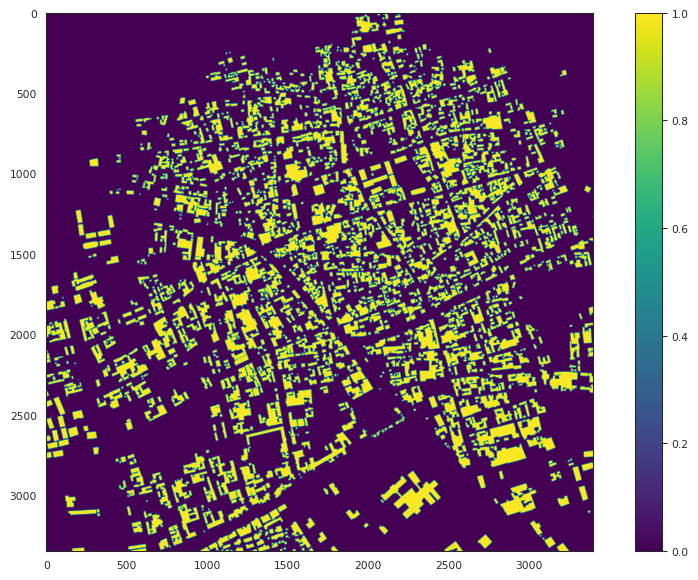

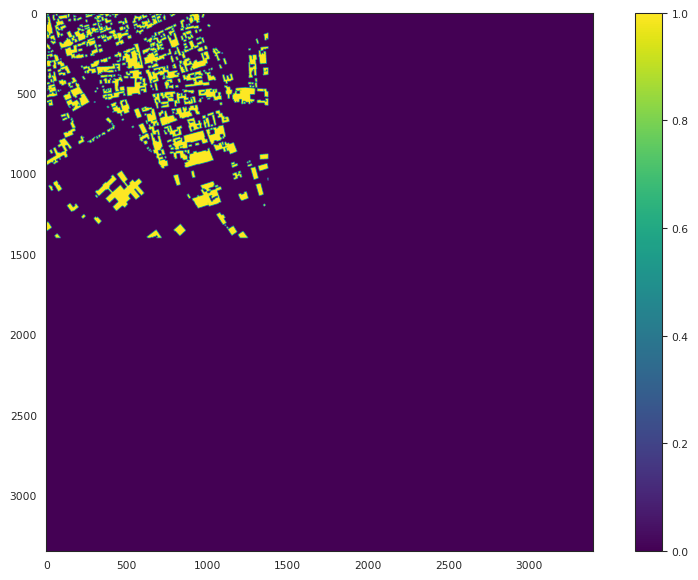

In [ ]:
# Difference between train_mask and train_mask_modified

tiff.imshow(train_mask)
tiff.imshow(train_mask_modified)



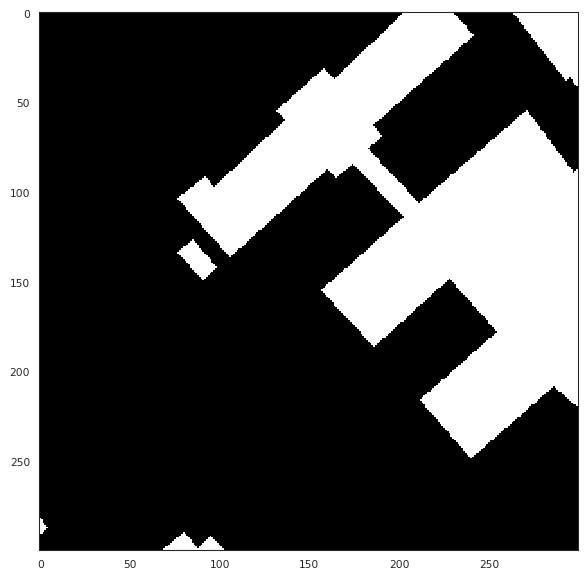

In [ ]:
# hack for nice display


def show_mask(m):
    tiff.imshow(255 * np.stack([m, m, m]));
show_mask(train_mask[2900:3200,2000:2300])



In [ ]:
im_rgb.reshape(-1, 3)

array([[660, 511, 354],
       [655, 509, 353],
       [648, 505, 352],
       ...,
       [841, 617, 397],
       [850, 622, 401],
       [832, 615, 397]], dtype=uint16)

In [ ]:
train_mask.reshape(-1)

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

training...
average precision 0.8324749159783426


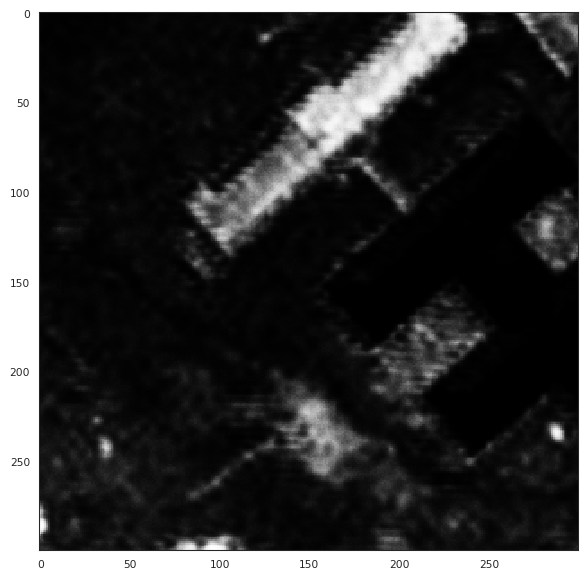

In [ ]:
'''
Here I am Using SGDClassifier for training, a machine learning model 

where im_rgb.reshape(-1, 3) is for training data points and train_mask.reshape(-1) is for predicting data points

'''


from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import average_precision_score


# training data points
xs = im_rgb.reshape(-1, 3).astype(np.float32)

# predicting data points
ys = train_mask.reshape(-1)

pipeline = make_pipeline(StandardScaler(), SGDClassifier(loss='log'))

print('training...')

# do not care about overfitting here
pipeline.fit(xs, ys)

pred_ys = pipeline.predict_proba(xs)[:, 1]

print('average precision', average_precision_score(ys, pred_ys))

pred_mask = pred_ys.reshape(train_mask.shape)

show_mask(pred_mask[2900:3200,2000:2300])

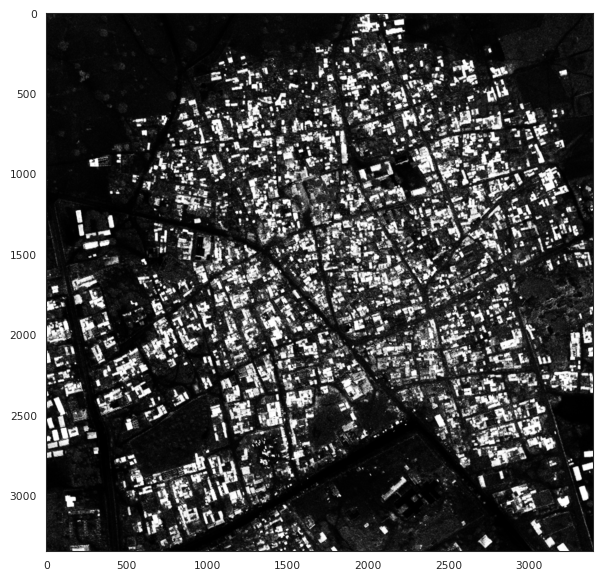

In [ ]:
show_mask(pred_mask)

In [ ]:
# Function for reading 8 channnel images for M band
def Sixteen_M(image_id):
    # https://www.kaggle.com/aamaia/dstl-satellite-imagery-feature-detection/rgb-using-m-bands-example
    zip_path = 'sixteen_band.zip'
    tgtImg = '{}_M.tif'.format(image_id)
    with zipfile.ZipFile(zip_path) as myzip:
        files_in_zip = myzip.namelist()
        for fname in files_in_zip:
            if fname.endswith(tgtImg):
                with myzip.open(fname) as myfile:
                    # img = tiff.imread(myfile).transpose([1, 2, 0])
                    img = tiff.imread(myfile)
                    return img

In [ ]:
def Sixteen_A(image_id):
    # https://www.kaggle.com/aamaia/dstl-satellite-imagery-feature-detection/rgb-using-m-bands-example
    zip_path = 'sixteen_band.zip'
    tgtImg = '{}_A.tif'.format(image_id)
    with zipfile.ZipFile(zip_path) as myzip:
        files_in_zip = myzip.namelist()
        for fname in files_in_zip:
            if fname.endswith(tgtImg):
                with myzip.open(fname) as myfile:
                    # img = tiff.imread(myfile).transpose([1, 2, 0])
                    img = tiff.imread(myfile)
                    return img

In [ ]:
def Sixteen_P(image_id):
    # https://www.kaggle.com/aamaia/dstl-satellite-imagery-feature-detection/rgb-using-m-bands-example
    zip_path = 'sixteen_band.zip'
    tgtImg = '{}_P.tif'.format(image_id)
    with zipfile.ZipFile(zip_path) as myzip:
        files_in_zip = myzip.namelist()
        for fname in files_in_zip:
            if fname.endswith(tgtImg):
                with myzip.open(fname) as myfile:
                    # img = tiff.imread(myfile).transpose([1, 2, 0])
                    img = tiff.imread(myfile)
                    return img

In [ ]:
ID='6120_2_2'

rgb = Three(ID)
ig_M = Sixteen_M(ID)
ig_A = Sixteen_A(ID)
ig_P = Sixteen_P(ID)

#     rgb = np.rollaxis(rgb, 0, 3)

# get our index
CCCI_M = CCCI_index(ig_M, rgb) 
CCCI_A = CCCI_index(ig_A, rgb) 
CCCI_P = ig_P

# you can look on histogram and pick your favorite threshold value(0.11 is my best)
binary_M = (CCCI_M > 0.11).astype(np.float32)
binary_A = (CCCI_A > 0.05).astype(np.float32)
binary_P = (CCCI_P *255).astype(np.float32)



In [ ]:
ig_P.shape

(3348, 3403)

(<Figure size 988.8x604.8 with 2 Axes>,
 <matplotlib.image.AxesImage at 0x7f2395e276d0>)

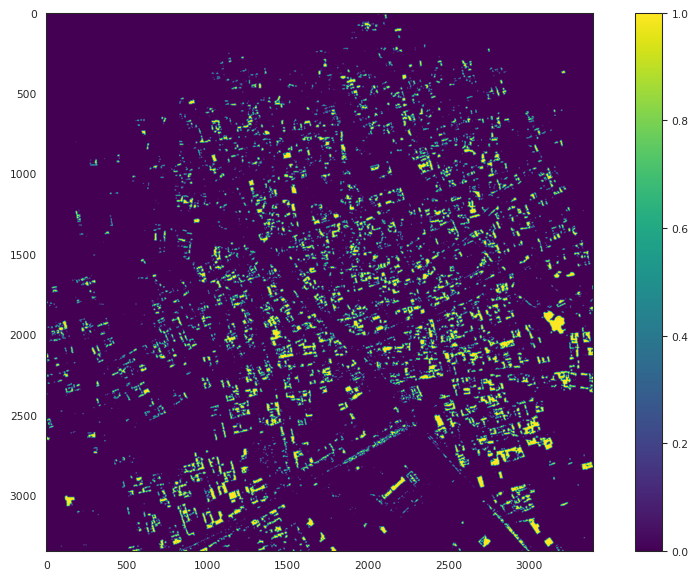

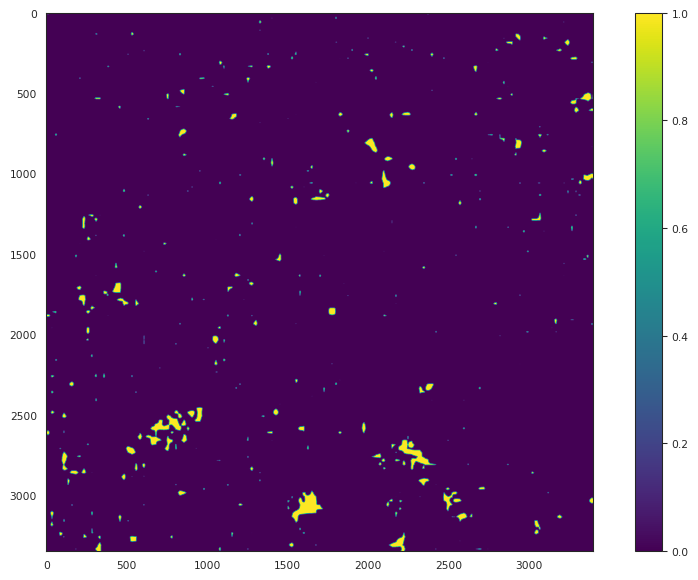

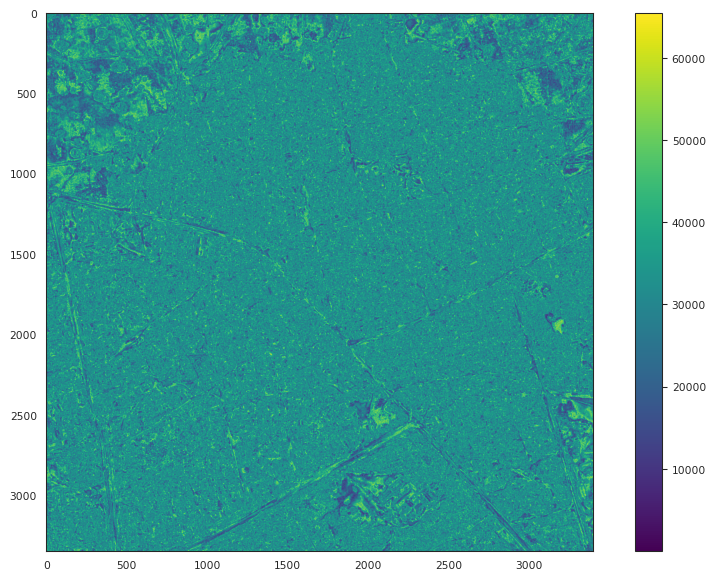

In [ ]:
tiff.imshow(binary_M)
tiff.imshow(binary_A)
tiff.imshow(binary_P)

In [ ]:
'''
stretch_8bit is another type of scaler function enhancing the image, that we defined above get_scalers() function.

'''
def stretch_8bit(bands, lower_percent=2, higher_percent=98):
    out = np.zeros_like(bands).astype(np.float32)
    for i in range(3):
        a = 0 
        b = 1 
        c = np.percentile(bands[:,:,i], lower_percent)
        d = np.percentile(bands[:,:,i], higher_percent)        
        t = a + (bands[:,:,i] - c) * (b - a) / (d - c)    
        t[t<a] = a
        t[t>b] = b
        out[:,:,i] =t
    return out.astype(np.float32)





from skimage.transform import resize
'''

CCCI_index(m,rgb) takes two input 8 channel(m) and 3 channel(rgb) 

what is CCCI(Canopy Chlorophyll Content Index)?

The Canopy Chlorophyll Content Index analyzes the amount of chlorophyll in vegetation,
thereby allowing detection of nitrogen starvation before the damage is irreversible.
The chlorophyll index (Cl) is applied to calculate the total amount of chlorophyll in plants.
In general, this index contains two separate bands: CIgreen and CIred-edge. 
These bands are responsive to slight variations in the chlorophyll content and are consistent for most types of plants.



What is the functionality of resize?
resize(m[5,:,:], (rgb.shape[0], rgb.shape[1]))


Resize image to match a certain size.

Performs interpolation to up-size or down-size N-dimensional images. 
Note that anti-aliasing should be enabled when down-sizing images to avoid aliasing artifacts.
For down-sampling with an integer factor also see skimage.transform.downscale_local_mean.

Return CCCI matrix.



'''

# m shape:- (8, 838, 835)  
# rgb shape:- (3350, 3338, 3)

def CCCI_index(m, rgb):
    RE  = resize(m[5,:,:], (rgb.shape[0], rgb.shape[1])) 
    MIR = resize(m[7,:,:], (rgb.shape[0], rgb.shape[1])) 
    R = rgb[:,:,0]
    # canopy chloropyll content index
    CCCI = (MIR-RE)/(MIR+RE)*(MIR-R)/(MIR+R)
    return CCCI    


In [ ]:
data = T_W
data = data[data.MultipolygonWKT != 'MULTIPOLYGON EMPTY']
data

In [ ]:
'''
8 channel, M band images 
'''
for IM_ID in data[data.ClassType == 7].ImageId:
    # read rgb and m bands
    rgb = Three(IM_ID) 
    print(rgb.shape)

    
    m = Sixteen_M(IM_ID)
    
    # get our index
    CCCI = CCCI_index(m, rgb) 
    
    # you can look on histogram and pick your favorite threshold value(0.11 is my best)
    binary = (CCCI > 0.11).astype(np.float32)
    
    fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(10, 10))
    ax = axes.ravel()
    ax[0].imshow(stretch_8bit(rgb))
    ax[0].set_title('Image')
    ax[0].axis('off')
    ax[1].imshow(binary, cmap='binary_r')
    ax[1].set_title('Binary')
    ax[1].axis('off')
    plt.tight_layout()
    plt.show()

In [ ]:
CCCI

In [ ]:
# Here we can see the forest, which shows the darker region. 
tiff.imshow(CCCI)

In [ ]:
# take some pictures from test 
waterway_test = ['6080_4_3','6080_4_0',
                 '6080_1_3', '6080_1_1',
                 '6150_3_4', '6050_2_1']

for IM_ID in waterway_test:
    # read rgb and m bands
    rgb = Three(IM_ID)
#     rgb = np.rollaxis(rgb, 0, 3)
    m = Sixteen_M(IM_ID)
    
    # get our index
    CCCI = CCCI_index(m, rgb) 
    
    # you can look on histogram and pick your favorite threshold value(0.11 is my best)
    binary = (CCCI > 0.11).astype(np.float32)
    
    fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(10, 10))
    ax = axes.ravel()
    ax[0].imshow(stretch_8bit(rgb))
    ax[0].set_title('RG')
    ax[0].axis('off')
    ax[1].imshow(binary, cmap='binary_r')
    ax[1].set_title('Binary')
    ax[1].axis('off')
    plt.tight_layout()
    plt.show()



# EDA for RGB images, by modifing the intensity values in the image.

In [ ]:
'''
Using skimage.exposure library for filtring the image through rescaling the intensity
img = skimage.exposure.rescale_intensity(img)

'''


import skimage.exposure


img = Three('6120_2_4')

print(img.shape)

print('img min/max pixel values: {}, {}'.format(img.min(), img.max()))



img = img.astype(np.float32)
img = skimage.exposure.rescale_intensity(img)  # will scale float values between 0.0 and 1.0

print('img dtype: {}'.format(img.dtype))
print('img shape: {}'.format(img.shape))
print('img min/max pixel values: {}, {}'.format(img.min(), img.max()))

img_orig = img.copy()

In [ ]:
# plot RGB
# Plotting the histograms for each channel for the required image, Each histogram explains how each channel plays the role in the image


img = img_orig.copy()
fig, axes = plt.subplots(figsize=(6,12), nrows=2, ncols=1)
axes[0].imshow(img)
for ich, color, ls in zip(range(3), ['red', 'green', 'blue'], ['-', '--', ':']):
    n, bins, patches = axes[1].hist(
        img[:,:,ich].flatten(), bins=20, color=color, histtype='step', lw=3.0, ls=ls)



In [ ]:
# what happens if we linearly stretch values to fill the range 0-1
# with a percentile clip to remove extreme values

img = img_orig.copy()
vmin = np.percentile(img, 2.0)
vmax = np.percentile(img, 98.0)
img[img<vmin] = vmin
img[img>vmax] = vmax
img = (img - img.min()) / (img.max() - img.min())
    
# plot RGB
fig, axes = plt.subplots(figsize=(6,12), nrows=2, ncols=1)
axes[0].imshow(img)
for ich, color, ls in zip(range(3), ['red', 'green', 'blue'], ['-', '--', ':']):
    n, bins, patches = axes[1].hist(
        img[:,:,ich].flatten(), bins=20, color=color, histtype='step', lw=3.0, ls=ls)

In [ ]:
# what happens if we linearly stretch each color channel to fill the range 0-1
# this seems to be what the plotRGB function in R does with stretch='lin'


img = img_orig.copy()
for ich in range(img.shape[2]):
    im = img[:,:,ich]
    vmin = np.percentile(im, 2.0)
    vmax = np.percentile(im, 98.0)
    im[im<vmin] = vmin
    im[im>vmax] = vmax
    im = (im - im.min()) / (im.max() - im.min())
    img[:,:,ich] = im
    
# plot RGB
fig, axes = plt.subplots(figsize=(6,12), nrows=2, ncols=1)
axes[0].imshow(img)
for ich, color, ls in zip(range(3), ['red', 'green', 'blue'], ['-', '--', ':']):
    n, bins, patches = axes[1].hist(
        img[:,:,ich].flatten(), bins=20, color=color, histtype='step', lw=3.0, ls=ls)



In [ ]:
# what happens if we equalize histogram each color channel 

# Below link explains equalize histogram
# https://www.youtube.com/watch?v=PD5d7EKYLcA

img = img_orig.copy()
for ich in range(img.shape[2]):
    im = img[:,:,ich]
    im = skimage.exposure.equalize_hist(im)
    img[:,:,ich] = im

# plot RGB
fig, axes = plt.subplots(figsize=(6,12), nrows=2, ncols=1)
axes[0].imshow(img)
for ich, color, ls in zip(range(3), ['red', 'green', 'blue'], ['-', '--', ':']):
    n, bins, patches = axes[1].hist(
        img[:,:,ich].flatten(), bins=20, color=color, histtype='step', lw=3.0, ls=ls)    
    

In [ ]:
# what happens if we equalize adaptive histogram each color channel.

'''
Adaptive histogram equalization (AHE) improves on this by transforming each pixel with a transformation function derived
from a neighbourhood region.

In its simplest form, each pixel is transformed based on the histogram of a square surrounding the pixel,

https://en.wikipedia.org/wiki/Adaptive_histogram_equalization

'''

img = img_orig.copy()
for ich in range(img.shape[2]):
    im = img[:,:,ich]
    im = skimage.exposure.equalize_adapthist(im)
    img[:,:,ich] = im

# plot RGB
fig, axes = plt.subplots(figsize=(6,12), nrows=2, ncols=1)
axes[0].imshow(img)
for ich, color, ls in zip(range(3), ['red', 'green', 'blue'], ['-', '--', ':']):
    n, bins, patches = axes[1].hist(
        img[:,:,ich].flatten(), bins=20, color=color, histtype='step', lw=3.0, ls=ls)

In [ ]:
os.mkdir('/kaggle/x_tr_a')
os.mkdir('/kaggle/x_tr_na')
os.mkdir('/kaggle/y_tr_a')
os.mkdir('/kaggle/y_tr_na')

os.mkdir('/kaggle/x_val_a')
os.mkdir('/kaggle/x_val_na')
os.mkdir('/kaggle/y_val_a')
os.mkdir('/kaggle/y_val_na')

os.mkdir('/kaggle/x_test_a')
os.mkdir('/kaggle/x_test_na')
os.mkdir('/kaggle/y_test_a')
os.mkdir('/kaggle/y_test_na')

In [ ]:
num_cls = 10
size = 160
smooth = 1e-12

# inDir = 'dstl-satellite-imagery-feature-detection'
# TR = pd.read_csv(inDir + '/train_wkt_v4.csv.zip')
# GS = pd.read_csv(inDir + '/grid_sizes.csv.zip', names=['ImageId', 'Xmax', 'Ymin'], skiprows=1)
# GS = GS.rename( columns={'Unnamed: 0':'ImageId'}) #rename 'ImageId'

import zipfile
with zipfile.ZipFile('/content/sample_submission.csv.zip', 'r') as zip_ref:
    zip_ref.extractall()


SF = pd.read_csv('sample_submission.csv')
SF




In [ ]:
print(TR.ImageId.unique())
len(TR.ImageId.unique())

In [ ]:
T_W

In [ ]:
print(T_W.ImageId.unique())
len(T_W.ImageId.unique())

In [ ]:
len(SF['ImageId'].unique())

## Preprocessing

In [ ]:
#https://www.kaggle.com/aamaia/rgb-using-m-bands-example

# "Contrast enhancement", similar to the default when opening an image using QGIS.

def adjust_contrast(bands, lower_percent=2, higher_percent=98):
    """
    to adjust the contrast of the image 
    bands is the image 
    """
    out = np.zeros_like(bands).astype(np.float32)
    n = bands.shape[2]
    for i in range(n):
        a = 0  # np.min(band)
        b = 1  # np.max(band)
        c = np.percentile(bands[:, :, i], lower_percent)
        d = np.percentile(bands[:, :, i], higher_percent)
        t = a + (bands[:, :, i] - c) * (b - a) / (d - c)
        t[t < a] = a
        t[t > b] = b
        out[:, :, i] = t

    return out.astype(np.float32)

# Combining all 25 images into one image

In [ ]:
num_cls = 10
size = 160
smooth = 1e-12
TR = pd.read_csv('/content/train_wkt_v4.csv.zip')
GS = pd.read_csv('/content/grid_sizes.csv.zip', names=['ImageId', 'Xmax', 'Ymin'], skiprows=1)

#SF = pd.read_csv('/content/sample_submission.csv')
GS = GS.rename( columns={'Unnamed: 0':'ImageId'}) #rename 'ImageId'

In [ ]:

def coordi_to_raster(coords, img_size, xmax, ymax):
    """
    converts coordinates(polygons) to raster(pixels).
    """
  
    H, W = img_size
    W1 = 1.0 * W * W / (W + 1)
    H1 = 1.0 * H * H / (H + 1)
    xf = W1 / xmax
    yf = H1 / ymax
    coords[:, 1] *= yf
    coords[:, 0] *= xf
    coords_int = np.round(coords).astype(np.int32)
    return coords_int

def convert_contours(polygonList, raster_img_size, xmax, ymax):
    """
    Returns exterior and interior coords of the given multipolygon,
    which are then used to create image masks with multipolygon objects.
    """
    perim_list = []
    interior_list = []
    
    if polygonList is None:
        return None

    for k in range(len(polygonList)):
        poly = polygonList[k]
        perim = np.array(list(poly.exterior.coords))
        perim_c = coordi_to_raster(perim, raster_img_size, xmax, ymax)
        perim_list.append(perim_c)
        for pi in poly.interiors:
            interior = np.array(list(pi.coords))
            interior_c = coordi_to_raster(interior, raster_img_size, xmax, ymax)
            interior_list.append(interior_c)
    return perim_list, interior_list


def generate_mask_for_image_and_class(raster_size, image_id, class_type):

    """
    returns generated image_mask using img_size(raster_size), image_id and class_type.
    """
    xmax, ymax = GS[GS.ImageId == image_id].iloc[0, 1:].astype(float)

    df_image = TR[TR.ImageId == image_id]

    multipoly_def = df_image[df_image.ClassType == class_type].MultipolygonWKT
    polygonList = None

    if len(multipoly_def) > 0:
        assert len(multipoly_def) == 1
        polygonList = wkt_loads(multipoly_def.values[0])
    
    contours = convert_contours(polygonList, raster_size, xmax, ymax)

    img_mask = np.zeros(raster_size, np.uint8)
    if contours is None:
        return img_mask
    perim_list, interior_list = contours
    cv2.fillPoly(img_mask, perim_list, 1)
    cv2.fillPoly(img_mask, interior_list, 0)

    return img_mask

In [ ]:
# T_W

In [ ]:
def M(image_id):
    # __author__ = amaia
    # https://www.kaggle.com/aamaia/dstl-satellite-imagery-feature-detection/rgb-using-m-bands-example
    zip_path = '/content/sixteen_band.zip'
    tgtImg = '{}_M.tif'.format(image_id)
    with zipfile.ZipFile(zip_path) as myzip:
        files_in_zip = myzip.namelist()
        for fname in files_in_zip:
            if fname.endswith(tgtImg):
                with myzip.open(fname) as myfile:
                    img = tiff.imread(myfile)
                    img = np.rollaxis(img, 0, 3)
                    return img
                
                

print ("let's combine all imgs together")
s = 835

X = np.zeros((5 * s, 5 * s, 8))
Y = np.zeros((5 * s, 5 * s, num_cls))  

ids = sorted(set(TR.ImageId))
print (len(ids))

for i in range(5):
    for j in range(5):
        id = ids[5 * i + j]

        rgb_img = M(id)
        img = adjust_contrast(rgb_img).copy()
        
        
        print (img.shape, id)
        X[s * i:s * i + s, s * j:s * j + s, :] = img[:s, :s, :]
        for z in range(num_cls):
            Y[s * i:s * i + s, s * j:s * j + s, z] = generate_mask_for_image_and_class((img.shape[0], img.shape[1]), id, z + 1)[:s, :s]

# np.save('/kaggle/data/X', X)
# np.save('/kaggle/data/Y', Y)
print(X.shape)
print(Y.shape)


In [ ]:
X.shape,Y.shape

In [ ]:
# Combining all 25 images into 1 image X
tiff.imshow(X)

In [ ]:
# All 25 masked image into 1 image.
tiff.imshow(Y)

In [ ]:
rgb_img = Three('6120_2_4')
tiff.imshow(adjust_contrast(rgb_img))

In [ ]:
# import os
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import cv2
# import tifffile as tiff
# from shapely.wkt import loads
# from shapely import affinity

# # living dangerously
# import warnings
# warnings.filterwarnings("ignore")

# SVEHICLE_TYPE = 10
# SVEHICLE_IMAGES = [ '6120_2_2',
#     '6100_1_3', '6140_3_1','6110_3_1','6100_2_3',
#     '6140_1_2','6120_2_0','6100_2_2','6110_1_2',
#     '6070_2_3','6110_4_0','6090_2_0','6060_2_3'
# ]

# PADDING = 10
# W = 3396
# H = 3348

# def P(image_id):
#     zip_path = '/content/sixteen_band.zip'
#     tgtImg = '{}_P.tif'.format(image_id)
#     with zipfile.ZipFile(zip_path) as myzip:
#         files_in_zip = myzip.namelist()
#         for fname in files_in_zip:
#             if fname.endswith(tgtImg):
#                 with myzip.open(fname) as myfile:
#                     img = tiff.imread(myfile)
#                     print(img.shape)
# #                     img = np.rollaxis(img, 0, 3)
#                     return img

# def RGB(image_id):
#     zip_path = '/content/three_band.zip'
#     tgtImg = '{}.tif'.format(image_id)
#     with zipfile.ZipFile(zip_path) as myzip:
#         files_in_zip = myzip.namelist()
#         for fname in files_in_zip:
#             if fname.endswith(tgtImg):
#                 with myzip.open(fname) as myfile:
#                     img = tiff.imread(myfile)
#                     img = np.rollaxis(img, 0, 3)
#                     return img
        
# #     filename = os.path.join('../input/dstl-satellite-imagery-feature-detection/three_band.zip', '{}.tif'.format(image_id))
# #     print(filename)
# #     img = tiff.imread(filename)
# #     img = np.rollaxis(img, 0, 3)    
# #     return img
    
# def M(image_id):
#     zip_path = '/content/sixteen_band.zip'
#     tgtImg = '{}_M.tif'.format(image_id)
#     with zipfile.ZipFile(zip_path) as myzip:
#         files_in_zip = myzip.namelist()
#         for fname in files_in_zip:
#             if fname.endswith(tgtImg):
#                 with myzip.open(fname) as myfile:
#                     img = tiff.imread(myfile)
#                     img = np.rollaxis(img, 0, 3)
#                     return img

# def stretch2(band, lower_percent=2, higher_percent=98):
#     a = 0 #np.min(band)
#     b = 255  #np.max(band)
#     c = np.percentile(band, lower_percent)
#     d = np.percentile(band, higher_percent)        
#     out = a + (band - c) * (b - a) / (d - c)    
#     out[out<a] = a
#     out[out>b] = b
#     return out

# def adjust_contrast(x):    
#     for i in range(3):
#         x[:,:,i] = stretch2(x[:,:,i])
#     return x.astype(np.uint8)
    
# def truth_polys(image_id, class_id):
#     #x = pd.read_csv('../input/dstl-satellite-imagery-feature-detection/train_wkt_v4.csv.zip')
#     # inDir = '../input/dstl-satellite-imagery-feature-detection'
#     # TR = pd.read_csv(inDir + '/train_wkt_v4.csv.zip')
#     rows = TR.loc[(TR.ImageId==image_id) & (TR.ClassType==class_id), 'MultipolygonWKT']
#     mp = loads(rows.values[0])
    
#     grid_sizes = GS
#     xmax, ymin = [(row[1], row[2]) for row in grid_sizes.values if row[0] == image_id][0]    
#     W_ = W * (W/(W+1))
#     H_ = H * (H/(H+1))
#     x_scaler = W_ / xmax
#     y_scaler = H_ / ymin
#     return affinity.scale(mp, xfact = x_scaler, yfact= y_scaler, origin=(0,0,0))
    

In [ ]:
# import zipfile

# z= zipfile.ZipFile('../input/dstl-satellite-imagery-feature-detection/three_band.zip')
# z

In [ ]:
    
    # patches = []
    # titles = []
    # for image_id in SVEHICLE_IMAGES:
    #     print(image_id)
    #     polys = truth_polys(image_id, SVEHICLE_TYPE)                
    #     rgb = RGB(image_id)
    #     #rgb = adjust_contrast(rgb)        
    #     #rgb = rgb.copy().astype(np.uint8)        
        
    #     img_p = P(image_id)
    #     img_p = cv2.resize(img_p, tuple(reversed(rgb.shape[:2])))        
    #     img_p = cv2.cvtColor(img_p, cv2.COLOR_GRAY2RGB)        
    #     img_p = adjust_contrast(img_p)
        
    #     img_m = M(image_id)
    #     img_m = cv2.resize(img_m, tuple(reversed(rgb.shape[:2])))                
    #     x = np.zeros_like(rgb)
    #     x[:,:,0] = img_m[:,:,4]
    #     x[:,:,1] = img_m[:,:,2]
    #     x[:,:,2] = img_m[:,:,1]
    #     x = adjust_contrast(x).copy()
                        
    #     for poly_id, poly in enumerate(polys):
    #         x1,y1,x2,y2 = [int(x) for x in poly.bounds]
    #         cv2.rectangle(x, (x1,y1), (x2,y2), (255,0,0), 1)
    #         cv2.rectangle(img_p, (x1,y1), (x2,y2), (255,0,0), 1)
    #         patches.append(np.hstack([x[y1-PADDING:y2+PADDING, x1-PADDING:x2+PADDING,:], img_p[y1-PADDING:y2+PADDING, x1-PADDING:x2+PADDING,:]]))
    #         titles.append("image_id: {} -- poly_id: {}".format(image_id, poly_id))
    
    

In [ ]:
# #random = np.arange(len(patches))
# #np.random.shuffle(random)
# c = 0
# for _ in range(15):
#     rows = 10
#     cols = 5
#     f, ax = plt.subplots(rows, cols, figsize=(10,10))
#     for i in range(rows):
#         for j in range(cols):                
#             c += 1
#             if c >= len(patches):
#                 break
#             ax[i,j].axis('off')
#             ax[i,j].grid(False)
#             ax[i,j].imshow(patches[c])                
#             # ax[i, j].set_title(titles[c])

In [ ]:
size

In [ ]:
# Augmentation

'''

1. Here the image size is (4175, 4175, 8).

2. For the x-axis I am subtracting 4175-160=4015 which I am storing in [xm].

3. Selecting random value between 0 to xm (4015) which I am storing in [xc].

4. Same for the y axis, where the random value is stored in [yc].


5. Now I take X image which is a combination of 25 images. 

6. Now I will extract a subsampled image of size [xc],[yc] where the values are generated randomly which is defined above (point 3).

7. The subsample image is stored in [im], same procedure for masked images store in [ms]. 

8. With [im] and [ms] I am applying augmentation techniques.

9. Here amt1 and amt2 defines the size of train and test data.


'''

def get_patches(img, msk, name1, name2, name3, name4, amt, aug=True):

    """
    returns image pathces(crops) of given image and mask
    patch_size = 160*160
    """

    random.seed(42)
    is2 = int(1.0 * size)
    print('is2',is2)


    xm, ym = img.shape[0] - is2, img.shape[1] - is2

    a, b , c, d = [], [], [], []

    # thresholds for each class to get patches
    tr = [0.4, 0.1, 0.1, 0.15, 0.3, 0.95, 0.1, 0.05, 0.001, 0.005]
    
    xyz = np.ceil(amt*0.10).astype(int)
    
    amt1 = amt-xyz
    
    
    
    amt2 = xyz
    

   # to get augmented data
    for i in range(amt1):

        xc = random.randint(0, xm)
        yc = random.randint(0, ym)


        im = img[xc:xc + is2, yc:yc + is2]
        # print('im',im)
        # tiff.imshow(im)
        
        ms = msk[xc:xc + is2, yc:yc + is2]
        # print('ms',ms)
        # tiff.imshow(ms)



     
        for j in range(num_cls):
            sm = np.sum(ms[:, :, j])

            if 1.0 * sm / is2 ** 2 > tr[j]:
               
                #augmentation
                if aug:
                    
                    # reversing
                    if random.uniform(0, 1) > 0.5:
                        im = im[::-1]
                        ms = ms[::-1]

                    #flipping 
                    if random.uniform(0, 1) > 0.5:
                        im = im[:, ::-1]
                        ms = ms[:, ::-1]
                    rotation = np.random.randint(4) # 0, 1, 2, 3

                    #transpose & rotation
                    if random.uniform(0, 1) > 0.5:
                       im = np.rot90(im.transpose((1,0,2)), k=rotation)
                       ms = np.rot90(ms.transpose((1,0,2)), k=rotation)
                    
                    #rotation
                    if random.uniform(0, 1) > 0.5:
                      im = np.rot90(im, k=rotation)
                      ms = np.rot90(ms, k=rotation)
                    
                    #shearing 
                    if random.uniform(0, 1) > 0.5:
                       im = tf.keras.preprocessing.image.apply_affine_transform(im, shear=0)
                       im = tf.keras.preprocessing.image.apply_affine_transform(im, shear=0)
                                     
                
                im = im.astype(np.float16)
                ms = ms.astype(np.float16)
                
                
                np.save("/kaggle/{}/{}".format(name1, i),im)  
                np.save("/kaggle/{}/{}".format(name2, i),ms)  
               
                a.append("/kaggle/{}/{}.npy".format(name1, i))
                b.append("/kaggle/{}/{}.npy".format(name2, i))

    # to get non-augmented data
    for i in range(amt2):
        xc = random.randint(0, xm)
        yc = random.randint(0, ym)

        im = img[xc:xc + is2, yc:yc + is2]
        ms = msk[xc:xc + is2, yc:yc + is2]

        im = im.astype(np.float16)
        ms = ms.astype(np.float16)
                                  
        np.save("/kaggle/{}/{}".format(name3, i),im)  
        np.save("/kaggle/{}/{}".format(name4, i),ms)  
                
        c.append("/kaggle/{}/{}.npy".format(name3, i))
        d.append("/kaggle/{}/{}.npy".format(name4, i))

    
    print(len(a), len(b))
    print(len(c), len(d))
  
    return a+c, b+d

In [ ]:
X.shape

In [ ]:
x_trn, y_trn = get_patches(X, Y, 'x_tr_a', 'y_tr_a', 'x_tr_na', 'y_tr_na', 20, aug=True)

In [ ]:
class Dataloder(tf.keras.utils.Sequence):    
    def __init__(self, dataset, batch_size=1, shuffle=False):
        self.dataset = dataset
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.indexes = np.arange(len(dataset))

    def __getitem__(self, i):
        
        # collect batch data
        start = i * self.batch_size
        stop = (i + 1) * self.batch_size
        data = []
        for j in range(start, stop):
            data.append(self.dataset[j])
        
        batch = [np.stack(samples, axis=0) for samples in zip(*data)]
        
        #print(len(batch))
        return tuple(batch)
    
    def __len__(self):
        return len(self.indexes) // self.batch_size

class Dataset:
  
    def __init__(self, images_dir, mask_dir):
        
        self.ids = images_dir
        self.images_fps = images_dir
        self.masks_fps  = mask_dir
    
    def __getitem__(self, i):
        
        # read data
        image = np.load(self.images_fps[i]) 
        mask  = np.load(self.masks_fps[i])

          
        image = np.stack(image, axis=-1).astype('float')
        mask = np.stack(mask, axis=-1).astype('float')

     
        image = np.transpose(image, (0,2,1)) 
        mask = np.transpose(mask, (0,2,1)) 
  
        return image, mask
      
    def __len__(self):
        return len(self.ids)

In [ ]:

#

In [ ]:
!rm /content/sixteen_band.zip
!rm /content/three_band.zip

import time
time.sleep(10)

## split the data into train, val and test 

In [ ]:
x_trn, y_trn = get_patches(X, Y, 'x_tr_a', 'y_tr_a', 'x_tr_na', 'y_tr_na', 20000, aug=True)

In [ ]:
x_val, y_val = get_patches(X, Y, 'x_val_a', 'y_val_a', 'x_val_na', 'y_val_na', 4000, aug=True)


In [ ]:
x_test, y_test = get_patches(X, Y, 'x_test_a', 'y_test_na', 'x_test_a', 'y_test_na', 4000, aug=True)


In [ ]:
train_dataset = Dataset(x_trn, y_trn)
train_dataloader = Dataloder(train_dataset, batch_size=8)
val_dataset = Dataset(x_val, y_val)
val_dataloader = Dataloder(val_dataset, batch_size=8)

In [ ]:
train_dataloader[0][0].shape

## Modelling

In [ ]:
def jaccard_coef(y_true, y_pred):
    """
    Jaccard Index: Intersection over Union.
    J(A,B) = |A∩B| / |A∪B| 
         = |A∩B| / |A|+|B|-|A∩B|
    """
    intersection = K.sum(y_true * y_pred, axis=[0, -1, -2])
    total = K.sum(y_true + y_pred, axis=[0, -1, -2])
    union = total - intersection

    jac = (intersection + smooth) / (union+ smooth)

    return K.mean(jac)

In [ ]:
size
Input(shape=(size, size, 8))



# SEGNet

In [ ]:
##fixing numpy RS
np.random.seed(42)
# from keras import Adam

##fixing tensorflow RS
tf.random.set_seed(32)

##python RS
rn.seed(12)

def SegNet():
    
    tf.random.set_seed(32)
    classes= 10
    img_input = Input(shape=(size, size, 8))
    x = img_input
    

    # Encoder 
    
    x = Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer = tf.keras.initializers.he_normal(seed= 23))(x)
    x = BatchNormalization()(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same',  kernel_initializer = tf.keras.initializers.he_normal(seed= 43))(x)
   # x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2), strides=(2, 2))(x)
    x = Dropout(0.25)(x)
    
    x = Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer = tf.keras.initializers.he_normal(seed= 32))(x)
    x = BatchNormalization()(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer = tf.keras.initializers.he_normal(seed= 41))(x)
   # x = BatchNormalization()(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer = tf.keras.initializers.he_normal(seed= 33))(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2), strides=(2, 2))(x)
    x = Dropout(0.5)(x)

    x = Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer = tf.keras.initializers.he_normal(seed= 35))(x)
    x = BatchNormalization()(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer = tf.keras.initializers.he_normal(seed= 54))(x)
    x = BatchNormalization()(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer = tf.keras.initializers.he_normal(seed= 39))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    
    #Decoder
    
    x = UpSampling2D(size=(2, 2))(x)
    x = Conv2D(128, kernel_size=3, activation='relu', padding='same', kernel_initializer = tf.keras.initializers.he_normal(seed= 45))(x)
   # x = BatchNormalization()(x)
    x = Conv2D(128, kernel_size=3, activation='relu', padding='same', kernel_initializer = tf.keras.initializers.he_normal(seed= 41))(x)
    x = BatchNormalization()(x)
    x = Conv2D(128, kernel_size=3, activation='relu', padding='same', kernel_initializer = tf.keras.initializers.he_normal(seed= 49))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.25)(x)
      
    x = UpSampling2D(size=(2, 2))(x)
    x = Conv2D(64, kernel_size=3, activation='relu', padding='same', kernel_initializer = tf.keras.initializers.he_normal(seed= 18))(x)
    x = BatchNormalization()(x)
    x = Conv2D(64, kernel_size=3, activation='relu', padding='same', kernel_initializer = tf.keras.initializers.he_normal(seed= 21))(x)
    x = BatchNormalization()(x)
    x = Conv2D(classes, kernel_size=3, activation='relu', padding='same', kernel_initializer = tf.keras.initializers.he_normal(seed= 16))(x)
    x = Dropout(0.25)(x)
  
    x = Activation("softmax")(x)
    
    model = Model(img_input, x)
  
    model.compile(optimizer=tf.keras.optimizers.Adam(lr=1e-4),loss='binary_crossentropy', metrics=[jaccard_coef])
    return model

In [ ]:
def changeLearningRate(epoch):

    #lr=0.001
    lr=0.0001
    if epoch > 10 and epoch <=20:
      lr*=0.1
    elif epoch > 20 and epoch <=30:
      lr*=0.01
    elif epoch > 30 and epoch <=40:
      lr*=0.001
    elif epoch > 40 and epoch <=50:  
      lr*=0.0001
    elif epoch > 50 and epoch <=60:  
      lr*=0.0001  
    elif epoch > 60:
      lr*=0.0001

    return lr

In [ ]:
#https://towardsdatascience.com/neural-network-with-tensorflow-how-to-stop-training-using-callback-5c8d575c18a9

ACCURACY_THRESHOLD=0.502
class myCallback(tf.keras.callbacks.Callback): 
    
    def on_epoch_end(self, epoch, logs={}): 
        if (logs.get('val_jaccard_coef') > ACCURACY_THRESHOLD) and (logs.get('jaccard_coef') > ACCURACY_THRESHOLD):   #and ((logs.get('accuracy')-logs.get('val_accuracy'))<=5):
          print("\nReached %2.2f%% accuracy, so stopping training!!" %(ACCURACY_THRESHOLD*100))   
          self.model.stop_training = True

stop = myCallback()

In [ ]:
filepath="/kaggle/model_weights/weights-{epoch:02d}-{val_jaccard_coef:.4f}.hdf5"

checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_loss',  verbose=1, save_best_only=True, mode='auto')

In [ ]:
rlrop = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose = 1, min_delta = 0.0001)
lrschedule = LearningRateScheduler(changeLearningRate, verbose=1)
#call_list = [checkpoint, lrschedule, rlrop, stop]

In [ ]:
model = SegNet()

In [ ]:
model.summary()



In [ ]:
epo=2
history_segnet = model.fit(train_dataloader, 
                              steps_per_epoch=len(train_dataloader),
                              epochs=epo,
                              validation_data=val_dataloader, 
                              callbacks=checkpoint
                              )

In [ ]:
test_dataset = Dataset(x_test, y_test)
test_dataloader = Dataloder(test_dataset, batch_size=1)

In [ ]:
Score= []
for i in tqdm(range(len(test_dataloader))):
   pred_msk = model.predict(test_dataloader[i][0])
   score = jaccard_coef(test_dataloader[i][1], pred_msk)
   Score.append(score)

In [ ]:

score = sum(Score)/len(test_dataloader)
print("The score on test data is", score.numpy())

## Error Analysis

In [ ]:

total_x = x_trn + x_val + x_test
total_y = y_trn + y_val+ y_test

In [ ]:
total_dataset = Dataset(total_x, total_y)
total_dataloader = Dataloder(total_dataset, batch_size=1)

In [ ]:
Score= []
very_low_jaccard=[]
medium_jaccard= []
very_high_jaccard= []

for i in tqdm(range(len(total_dataloader))):

   pred_msk = model.predict(total_dataloader[i][0])
   score = jaccard_coef(total_dataloader[i][1], pred_msk)
   
   if score>0 and score <=0.20:
      very_low_jaccard.append(i)

   elif score>0.20 and score <=0.70:
      medium_jaccard.append(i)
   
   elif score>0.70 and score <=1:
      very_high_jaccard.append(i)

In [ ]:

Very_low_jaccard_x = []
Medium_jaccard_x = []
Very_high_jaccard_x = []

Very_low_jaccard_y = []
Medium_jaccard_y = []
Very_high_jaccard_y = []

for i in very_low_jaccard:
   Very_low_jaccard_x.append(total_x[i])
for i in medium_jaccard:
   Medium_jaccard_x.append(total_x[i])
for i in very_high_jaccard:
   Very_high_jaccard_x.append(total_x[i])      

for i in very_low_jaccard:
   Very_low_jaccard_y.append(total_y[i])
for i in medium_jaccard:
   Medium_jaccard_y.append(total_y[i])
for i in very_high_jaccard:
   Very_high_jaccard_y.append(total_y[i])

In [ ]:
np.save("vljx", Very_low_jaccard_x)
np.save("vljy", Very_low_jaccard_y)

In [ ]:

vljx = np.load("vljx.npy")
vljy = np.load("vljy.npy")

In [ ]:
len(vljx)
vljx[1]

In [ ]:

# def mask_to_polygons(mask, epsilon=5, min_area=1.):
#     """
#     converts a mask into polygons.
#     """
    
#     contours, hierarchy = cv2.findContours(((mask == 1) * 255).astype(np.uint8), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_TC89_KCOS)
#     approx_contours = [cv2.approxPolyDP(cnt, epsilon, True)
#                        for cnt in contours]
#     if not contours:
#         return MultiPolygon()

#     cnt_children = defaultdict(list)
#     child_contours = set()
#     assert hierarchy.shape[0] == 1

#     for idx, (_, _, _, parent_idx) in enumerate(hierarchy[0]):
#         if parent_idx != -1:
#             child_contours.add(idx)
#             cnt_children[parent_idx].append(approx_contours[idx])

#     # create actual polygons filtering by area (removes artifacts)
#     all_polygons = []
#     for idx, cnt in enumerate(approx_contours):
#         if idx not in child_contours and cv2.contourArea(cnt) >= min_area:
#             assert cnt.shape[1] == 1
#             poly = Polygon(
#                 shell=cnt[:, 0, :],
#                 holes=[c[:, 0, :] for c in cnt_children.get(idx, [])
#                        if cv2.contourArea(c) >= min_area])
#             all_polygons.append(poly)
#     # approximating polygons might have created invalid ones, fix them
#     all_polygons = MultiPolygon(all_polygons)
#     if not all_polygons.is_valid:
#         all_polygons = all_polygons.buffer(0)
#         # Sometimes buffer() converts a simple Multipolygon to just a Polygon,
#         # need to keep it a Multi throughout
#         if all_polygons.type == 'Polygon':
#             all_polygons = MultiPolygon([all_polygons])
#     return all_polygons

In [ ]:

# DF  = pd.DataFrame(columns=["image", "class", "poly"])

# for i in range(25):
#    abcd = np.load(vljy[i])
#    image, cl , ploy = [],[],[]
  
#    for j in range(10):
#      ab = mask_to_polygons(abcd[:,:,j], epsilon=1)
#      image.append(i+1)
#      cl.append(j+1)
#      ploy.append(len(ab))
#      df = pd.DataFrame(list(zip(image, cl, ploy)), columns = ['image', 'class', 'poly'])

#    DF = pd.concat([DF,df], ignore_index=True)

# DF

In [ ]:
# objects_per_image = DF.pivot(index='class', columns='image', values='poly')

In [ ]:
# %matplotlib inline
# figure, axis = plt.subplots(figsize=(20, 5))
# axis.set_aspect('equal')
# plt.imshow(objects_per_image.astype(np.uint), cmap='Accent_r', extent=[0, 25, 10, 0])

# plt.xticks(np.arange(1, 25, 1.0))
# plt.yticks(np.arange(1, 11, 1.0))
# plt.title('Number of objects per image')
# plt.xlabel('Images')
# plt.ylabel('Classes')
# plt.colorbar()
# plt.show()

### Observations

In [ ]:

print("minimum value in an image",np.amin(np.load(vljx[0])))
print("maximum value in an image",np.amax(np.load(vljx[0])))

In [ ]:
threshold = 0.4
Sum = []

for i in tqdm(range(25)):
   a = np.load(vljx[i])
   im= []
   for j in range(8):
     im.append(np.count_nonzero(np.less(a[:,:,j], threshold))) 
   x = sum(im)
   Sum.append(x)  
percentage = (sum(Sum)/(160*160*8*25))*100

Observations

In [ ]:

def plot_image(image_id):

  m = np.load(vljx[image_id])
  m = adjust_contrast(m)
  img = np.zeros((m.shape[0],m.shape[1],3))
  img[:,:,0] = m[:,:,4] #red
  img[:,:,1] = m[:,:,2] #green
  img[:,:,2] = m[:,:,1] #blue
  #plt.figure(figsize=(7,7))
  tiff.imshow(img, interpolation='nearest')
  # plt.show()

In [ ]:
def plot_mask(mask_id):
  m = np.load(vljy[i])
  m = adjust_contrast(m)
  img = np.zeros((m.shape[0],m.shape[1],3)) 
  img[:,:,0] = m[:,:,4] #red
  img[:,:,1] = m[:,:,2] #green
  img[:,:,2] = m[:,:,1] #blue
  #plt.figure(figsize=(7,7))
  tiff.imshow(img, interpolation='nearest')
  # plt.show()

In [ ]:
for i in range(50):
   plot_image(i)
   plot_mask(i)

# UNet

In [ ]:
def get_crop_shape(target, refer):
    # width, the 3rd dimension
    cw = (target.get_shape()[2] - refer.get_shape()[2])
    assert (cw >= 0)
    if cw % 2 != 0:
        cw1, cw2 = int(cw/2), int(cw/2) + 1
    else:
        cw1, cw2 = int(cw/2), int(cw/2)
    # height, the 2nd dimension
    ch = (target.get_shape()[1] - refer.get_shape()[1])
    assert (ch >= 0)
    if ch % 2 != 0:
        ch1, ch2 = int(ch/2), int(ch/2) + 1
    else:
        ch1, ch2 = int(ch/2), int(ch/2)

    return (ch1, ch2), (cw1, cw2)


def get_unet():
    concat_axis = 3

    inputs = Input((size, size, 8))
    
    conv1 = Conv2D(32, (3, 3), padding="same", name="conv1_1", activation="relu", data_format="channels_last")(inputs)
    conv1 = Conv2D(32, (3, 3), padding="same", activation="relu", data_format="channels_last")(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(conv1)

    conv2 = Conv2D(64, (3, 3), padding="same", activation="relu", data_format="channels_last")(pool1)
    conv2 = Conv2D(64, (3, 3), padding="same", activation="relu", data_format="channels_last")(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(conv2)

    conv3 = Conv2D(128, (3, 3), padding="same", activation="relu", data_format="channels_last")(pool2)
    conv3 = Conv2D(128, (3, 3), padding="same", activation="relu", data_format="channels_last")(conv3)

    up_conv3 = UpSampling2D(size=(2, 2), data_format="channels_last")(conv3)
    ch, cw = get_crop_shape(conv2, up_conv3)
    crop_conv2 = Cropping2D(cropping=(ch,cw), data_format="channels_last")(conv2)
    up8   = concatenate([up_conv3, crop_conv2], axis=concat_axis)
    conv8 = Conv2D(64, (3, 3), padding="same", activation="relu", data_format="channels_last")(up8)
    conv8 = Conv2D(64, (3, 3), padding="same", activation="relu", data_format="channels_last")(conv8)

    up_conv8 = UpSampling2D(size=(2, 2), data_format="channels_last")(conv8)
    ch, cw = get_crop_shape(conv1, up_conv8)
    crop_conv1 = Cropping2D(cropping=(ch,cw), data_format="channels_last")(conv1)
    up9   = concatenate([up_conv8, crop_conv1], axis=concat_axis)
    conv9 = Conv2D(32, (3, 3), padding="same", activation="relu", data_format="channels_last")(up9)
    conv9 = Conv2D(32, (3, 3), padding="same", activation="relu", data_format="channels_last")(conv9)

    ch, cw = get_crop_shape(inputs, conv9)
    conv9  = ZeroPadding2D(padding=(ch[0],cw[0]), data_format="channels_last")(conv9)
    conv10 = Conv2D(1, (1, 1), data_format="channels_last", activation="sigmoid")(conv9)
      
    model = Model(inputs=inputs, outputs=conv10)
#     model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
    model.compile(optimizer=tf.keras.optimizers.Adam(lr=1e-4), loss='binary_crossentropy', metrics=[jaccard_coef])
    
    return model


model=get_unet()
history_unet=model.fit(train_dataloader, 
                              steps_per_epoch=len(train_dataloader),
                              epochs=epo,
                              validation_data=val_dataloader, 
                              callbacks=checkpoint
                              )

# CAnet

In [ ]:
import math
from PIL import Image, ImageDraw
from PIL import ImagePath
import pandas as pd
import os
from os import path
from tqdm import tqdm
import json
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib
import tensorflow as tf
# tf.compat.v1.enable_eager_execution()
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import UpSampling2D
from tensorflow.keras.layers import MaxPooling2D, GlobalAveragePooling2D,Conv2D
from tensorflow.keras.layers import concatenate
from tensorflow.keras.layers import Multiply
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.initializers import glorot_uniform

In [ ]:
import numpy as np


class convolutional_block(tf.keras.layers.Layer):
    def __init__(self, kernel,  filters, stride, name):
        super().__init__(name=name)
        self.F1, self.F2, self.F3 = filters
        self.kernel = kernel
        self.stride = stride


        self.conv_1=Conv2D(filters=self.F1,kernel_size=(1,1),strides=stride,padding='same')
        self.conv_2=Conv2D(filters=self.F2,kernel_size=(3,3),padding='same')
        self.conv_3=Conv2D(filters=self.F3,kernel_size=(1,1),padding='same')
        self.conv_pa=Conv2D(filters=self.F3,kernel_size=(3,3),strides=stride,padding='same')


        self.b1=BatchNormalization()
        self.b2=BatchNormalization()
        self.b3=BatchNormalization()
        self.b4=BatchNormalization()
  

        self.a1=Activation('relu')
        self.a2=Activation('relu')
        self.a3=Activation('relu')
        self.a4=Activation('relu')

    def call(self, X):

        c=self.conv_1(X)
        c=self.b1(c)
        c=self.a1(c)

        c=self.conv_2(c)
        c=self.b2(c)
        c=self.a2(c)

        c=self.conv_3(c)
        c=self.b3(c)
        

        #parallel

        conv_p = self.conv_pa(X)
        b_4   = self.b4(conv_p)
        a_3   = self.a3(b_4)

        ele_sum = add([c,a_3])
       
        X = self.a4(ele_sum)    

        return X



class identity_block(tf.keras.layers.Layer):
    def __init__(self, kernel,  filters, name="identity block"):
        super().__init__(name=name)
        self.F1, self.F2, self.F3 = filters
        self.kernel = kernel



        self.conv_1=Conv2D(filters=self.F1,kernel_size=1,padding='same')
        self.conv_2=Conv2D(filters=self.F2,kernel_size=3,padding='same')
        self.conv_3=Conv2D(filters=self.F3,kernel_size=1,padding='same')
        # self.conv_pa=Conv2D(filters=self.F1,kernel_size=3,padding='same')


        self.b1=BatchNormalization()
        self.b2=BatchNormalization()
        self.b3=BatchNormalization()
        self.b4=BatchNormalization()
  

        self.a1=Activation('relu')
        self.a2=Activation('relu')
        self.a3=Activation('relu')
        self.a4=Activation('relu')


    def call(self, X):
        # write the architecutre that was mentioned above

        c=self.conv_1(X)
        c=self.b1(c)
        c=self.a1(c)

        c=self.conv_2(c)
        c=self.b2(c)
        c=self.a2(c)


        c=self.conv_3(c)
        c=self.b3(c)
        c=self.a3(c)  
        

        ele_sum = add([X,c])      
        X = self.a4(ele_sum)      

        return X






class global_flow(tf.keras.layers.Layer):
    def __init__(self, name="global_flow"):
        super().__init__(name=name)
        # self.F1, self.F2, self.F3 = filters
        # self.kernel = kernel

        self.glob=GlobalAveragePooling2D()
        self.b1=BatchNormalization()
        self.a1=Activation('relu')

        self.conv1 = Conv2D(32,kernel_size=(1,1),padding='same')
        self.upsampling = UpSampling2D(size=(20, 20), interpolation='bilinear')
        self.reshape=Reshape((1,1,64))
       
    def call(self, X):
        # implement the global flow operatiom
        g=self.glob(X)
        # g=tf.reshape(g,[1,1,1,g.shape[1]])
        # g=tf.reshape(g,[1,1,64])

        b=self.b1(g)
        a=self.a1(b)
        # a=Reshape(a,[1,1,64])
        a = self.reshape(a)



        c=self.conv1(a)
        u=self.upsampling(c)

        return u




class context_flow(tf.keras.layers.Layer):    
    def __init__(self, name="context_flow"):
        super().__init__(name=name)

        self.avg=AveragePooling2D(pool_size=(2, 2))

        
        self.conv1=Conv2D(filters=32,kernel_size=3,padding='same')
        self.conv2=Conv2D(filters=32,kernel_size=3,padding='same')

        # self.conv_1=Conv2D(filters=32,kernel_size=(1,1),padding='same')

        self.conv3=Conv2D(filters=32,kernel_size=1,padding='same')
        self.conv4=Conv2D(filters=32,kernel_size=1,padding='same')

        self.a1=Activation('relu')

        self.b1=BatchNormalization()

        self.a2=Activation('sigmoid')


    def call(self, X):
        # here X will a list of two elements 
        INP, FLOW = X[0],X[1] 
        concat=concatenate([INP, FLOW])
        # print("concat shape",concat.shape)
        avg1=self.avg(concat)
       
        c1=self.conv1(avg1)
        # print('conv_shape_1',c1.shape)

        X=self.conv2(c1)
        # print('conv_shape_2',c1.shape)

        c2=self.conv3(X)
        # print('conv_shape_3',c2.shape)
        a=self.a1(c2)
        c3=self.conv4(a)
        # print('con_shape_4',c3.shape)
        y=self.a2(c3)

        # print('y and X shape',y.shape,X.shape)  
        z=multiply([X,y])
        ad=add([z,X])
        # print('add__shape',ad.shape)
        u=UpSampling2D(size=(2, 2),interpolation="bilinear")(ad)




        # implement the context flow as mentioned in the above cell
        return u



class fsm(tf.keras.layers.Layer):    
    def __init__(self, name="feature_selection"):
        super().__init__(name=name)

        self.conv=Conv2D(filters=32,kernel_size=(3,3),padding='same')

        self.conv_1=Conv2D(filters=32,kernel_size=(1,1),padding='same')
        
        self.glob = GlobalMaxPooling2D()

        self.b1=BatchNormalization()

        self.a2=Activation('sigmoid')

        self.up=UpSampling2D(size=(2, 2),interpolation="bilinear")

        
    def call(self, X):
        # implement the FSM modules based on image in the above cells
        c1=self.conv(X)

        g=self.glob(c1)

        g=tf.reshape(g,tf.constant([-1,1,1,g.shape[1]]))

        c2=self.conv_1(g)

        b1=self.b1(c2)

        a1=self.a2(b1)

        m=multiply([c1,a1])

        X=self.up(m)


        return X



class agcn(tf.keras.layers.Layer):    
    def __init__(self, name="global_conv_net"):
        super().__init__(name=name)

        self.conv1=Conv2D(filters=32,kernel_size=(1,7),padding='same',strides=(1,1))
        self.conv2=Conv2D(filters=32,kernel_size=(1,7),padding='same',strides=(1,1))

        self.conv3=Conv2D(filters=32,kernel_size=(7,1),padding='same',strides=(1,1))
        self.conv4=Conv2D(filters=32,kernel_size=(7,1),padding='same',strides=(1,1))

        self.conv5=Conv2D(filters=32,kernel_size=(3,3),padding='same',strides=(1,1))


    def call(self, X):
        # please implement the above mentioned architecture

        c1=self.conv3(X)  
        c2=self.conv1(c1)

        c3=self.conv3(X)
        c4=self.conv4(c3)

        ad=add([c2,c4])

        c5=self.conv5(ad)

        X=add([c5,ad])


        return X





X_input = Input((size, size, 8))

# Stage 1
X = Conv2D(64, (3, 3), name='conv1', padding="same", kernel_initializer=glorot_uniform(seed=0))(X_input)
X = BatchNormalization(axis=3, name='bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((2, 2), strides=(2, 2))(X)
print(X.shape)

print('c1')
c1=convolutional_block(kernel=3,filters = [4, 4, 8], stride=2,name = 'conv_block_1')(X)
i1=identity_block(kernel=3,filters = [4, 4, 8],name = 'conv_block_2')(c1)
print(i1.shape)


print('c2')

c2=convolutional_block(kernel=3,filters = [8, 8, 16], stride=2,name = 'conv_block_3')(i1)
i2=identity_block(kernel=3,filters = [8, 8, 16],name = 'conv_block_4')(c2)
i2=identity_block(kernel=3,filters = [8, 8, 16],name = 'conv_block_5')(i2)
print(i2.shape)


print('c3')
c3=convolutional_block(kernel=3,filters = [16, 16, 32], stride=1,name = 'conv_block_6')(i2)
i3=identity_block(kernel=3,filters = [16, 16, 32],name = 'conv_block_7')(c3)
i3=identity_block(kernel=3,filters = [16, 16, 32],name = 'conv_block_8')(i3)
i3=identity_block(kernel=3,filters = [16, 16, 32],name = 'conv_block_9')(i3)
print(i3.shape)


print('c4')
c4=convolutional_block(kernel=3,filters = [32, 32, 64], stride=1,name = 'conv_block_10')(i3)
i4=identity_block(kernel=32,filters = [32, 32, 64],name = 'conv_block_11')(c4)
i4=identity_block(kernel=32,filters = [32, 32, 64],name = 'conv_block_12')(i4)
i4=identity_block(kernel=32,filters = [32, 32, 64],name = 'conv_block_13')(i4)


print('i4',i4.shape)

print('global')
g1=global_flow(name='global_flow')(i4)
print(g1.shape)


cf_1=context_flow(name='context_flow_1')((i4,g1))
print('context-flow_1 shape',cf_1.shape)

cf_2=context_flow(name='context_flow_2')((i4,cf_1))
print('context-flow_2 shape',cf_2.shape)


cf_3=context_flow(name='context_flow_3')((i4,cf_2))
print('context-flow_3 shape',cf_3.shape)

su=add([g1,cf_1,cf_2,cf_3])
print('sum_shape',su.shape)

fs=fsm()(su)
print('fsm_shape',fs.shape)


ag=agcn()(i1)
print('agcn_shape',ag.shape)


co=concatenate([ag,fs])
print('concatination_shape',co.shape)

final_conv=Conv2D(filters=10,kernel_size=3,padding='same')(co)
final_ac_1=Activation('relu')(final_conv)

print('final_activation_shape_1',final_ac_1.shape)

final_up=UpSampling2D(size=(4, 4),interpolation="bilinear")(final_ac_1)
print('final_upsampling_shape',final_up.shape)

final_ac_2=Activation('softmax')(final_up)
print('final_activation_shape_2',final_ac_2.shape)




model = Model(inputs = X_input , outputs = final_ac_2)

model.summary()

# import datetime
# from keras import optimizers
# from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, TensorBoard

# !pip install git+https://github.com/qubvel/segmentation_models

# !pip install q tensorflow==2.1
# !pip install segmentation-models



In [ ]:

optim = tf.keras.optimizers.Adam(0.0001)



# actulally total_loss can be imported directly from library, above example just show you how to manipulate with losses
# total_loss = sm.losses.binary_focal_dice_loss 
# or total_loss = sm.losses.categorical_focal_dice_loss 

model.compile(optim, loss='binary_crossentropy', metrics=[jaccard_coef])


In [ ]:
# !pip install q tensorflow==1.15
# !pip install segmentation-models

history_canet=model.fit(train_dataloader, 
                              steps_per_epoch=len(train_dataloader),
                              epochs=epo,
                              validation_data=val_dataloader, 
                              callbacks=checkpoint
                              )